In [738]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

In [739]:
df = pd.read_csv('train.csv')

In [740]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [741]:
df.shape

(891, 12)

In [742]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [743]:
test_df = pd.read_csv('test.csv')

In [744]:
df['Sex'] = df['Sex'].astype(str)
df['Embarked'] = df['Embarked'].astype(str)

EDA Titanic train data set

In [463]:
fig = px.bar(df.groupby(['Pclass'])['Survived'].sum())
fig.show()

In [464]:
df['age_group'] = pd.cut(df['Age'],bins = [0,20,35,50,65,80,100],labels = ['0-20','21-35','36-50','51-65','66-80','81+'])

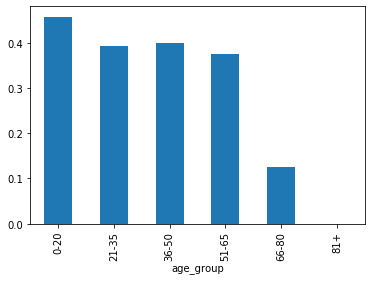

In [240]:
df.groupby(['age_group'])['Survived'].mean().plot.bar()

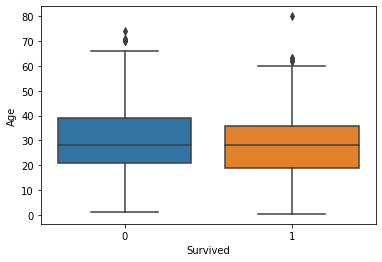

In [63]:
sns.boxplot(data = df,x= 'Survived',y = 'Age')
plt.show()

In [60]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

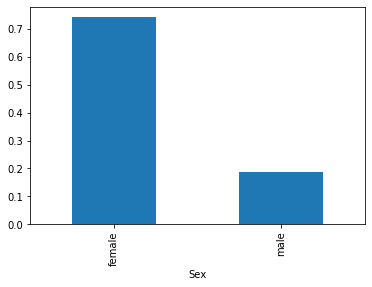

In [65]:
df.groupby(['Sex'])['Survived'].mean().plot.bar()

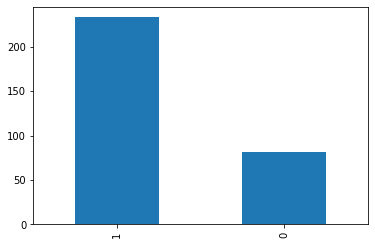

In [76]:
df[df['Sex'] == 'female']['Survived'].value_counts().plot.bar()

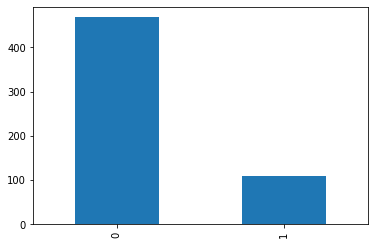

In [77]:
df[df['Sex'] == 'male']['Survived'].value_counts().plot.bar()

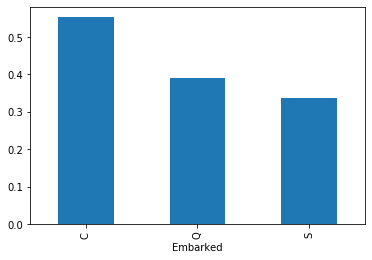

In [79]:
df.groupby(['Embarked'])['Survived'].mean().plot.bar()

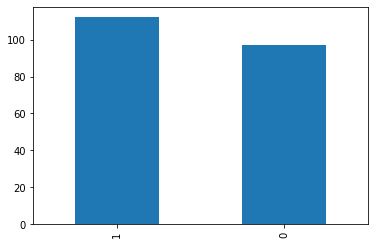

In [83]:
df[df['SibSp'] == 1]['Survived'].value_counts().plot.bar()

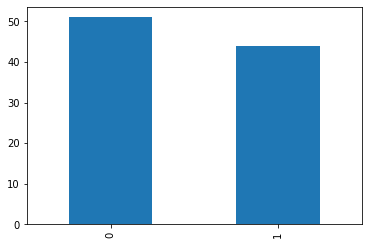

In [88]:
df[df['Parch'] > 1]['Survived'].value_counts().plot.bar()

In [465]:
df['Age'].value_counts(normalize = True)

24.00    0.042017
22.00    0.037815
18.00    0.036415
19.00    0.035014
30.00    0.035014
           ...   
55.50    0.001401
70.50    0.001401
66.00    0.001401
23.50    0.001401
0.42     0.001401
Name: Age, Length: 88, dtype: float64

In [466]:
df['Age'].mode()

0    24.0
dtype: float64

In [745]:
#df['Age'].fillna(df['Age'].mode()[0],inplace = True)
df['Age'].fillna(0,inplace = True)

In [746]:
df['Age'].isnull().sum()

0

In [747]:
x.head()

,Age,Pclass,SibSp,Parch,Embarked_v
0,22.0,3,1,0,2
1,38.0,1,1,0,0
2,26.0,3,0,0,2
3,35.0,1,1,0,2
4,35.0,3,0,0,2


In [748]:
labels = LabelEncoder()
df['Embarked_v'] = labels.fit_transform(df['Embarked'])
df['Sex_v'] = labels.fit_transform(df['Sex'])



In [749]:
y = df['Survived']

In [750]:
x = df[['Age','Pclass','SibSp','Parch','Embarked_v','Sex_v']]

In [751]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [752]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30,random_state = 0)
#st_x = StandardScaler()
#x_train = st_x.fit_trasform(x_train)
#x_test = st_x.transform(x_test)
classifier = RandomForestClassifier(n_estimators = 20,criterion = 'entropy')
classifier.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [753]:
y_predict = classifier.predict(x_test)

In [754]:
y_train.shape

(668,)

In [755]:
y_predict

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1], dtype=int64)

In [756]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_test,y_predict)

In [757]:
accuracy_score(y_test,y_predict)

0.7892376681614349

In [758]:
cm

array([[116,  23],
       [ 24,  60]], dtype=int64)

In [759]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [580]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [760]:
test_df['Age'].isnull().sum()

86

In [761]:
#test_df['Age'].fillna(test_df['Age'].mode()[0],inplace = True)
test_df['Age'].fillna(0,inplace = True)

In [762]:
test_df['Sex'] = test_df['Sex'].astype(str)
test_df['Embarked'] = test_df['Embarked'].astype(str)

In [763]:
test_df['Sex_v'] = labels.fit_transform(test_df['Sex'])
test_df['Embarked_v'] = labels.fit_transform(test_df['Embarked'])

In [765]:
x1_test = test_df[['Pclass','Age','SibSp','Parch','Embarked_v','Sex_v']]

In [766]:
test_df['Age'].mode()[0]

0.0

In [767]:
test_predict = classifier.predict(x1_test)

In [768]:
pred = pd.DataFrame(test_predict)

In [772]:
pred.to_csv('test_predict1.csv')

In [770]:
pred

,0
0,0
1,1
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [771]:
test_predict

array([0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,